## Undirected Graph

In [1]:
import networkx as nx
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

import os
import sys

sys.path.append(f"{os.getcwd()}/..")

from utils import draw_graph

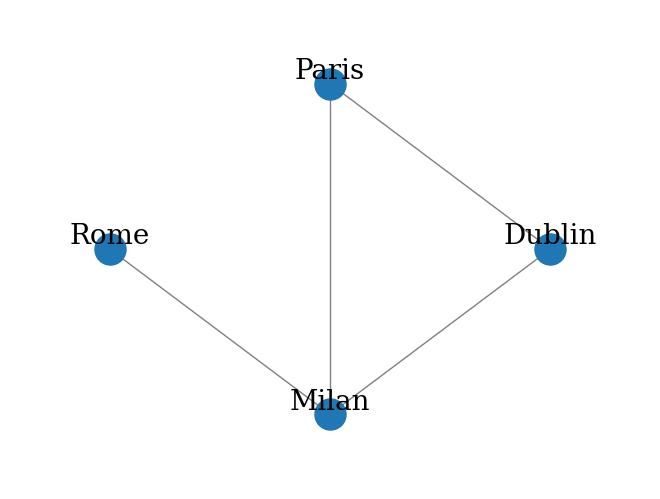

In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
V = {'Dublin', 'Paris', 'Milan', 'Rome'}
E = [('Milan','Dublin'), ('Milan','Paris'), ('Paris','Dublin'), ('Milan','Rome')]
G.add_nodes_from(V)
G.add_edges_from(E)
draw_graph(G, layout=nx.shell_layout, node_size=500)

In [3]:
dict(G.nodes)

{'Rome': {}, 'Milan': {}, 'Dublin': {}, 'Paris': {}}

In [4]:
print(f"V = {G.nodes}")
print(f"E = {G.edges}")

V = ['Rome', 'Milan', 'Dublin', 'Paris']
E = [('Rome', 'Milan'), ('Milan', 'Dublin'), ('Milan', 'Paris'), ('Dublin', 'Paris')]


In [5]:
{G.degree(v): v for v in G.nodes}

{1: 'Rome', 3: 'Milan', 2: 'Paris'}

In [6]:
print(f"Graph Order: {G.number_of_nodes()}")
print(f"Graph Size: {G.number_of_edges()}")
print(f"Degree for nodes: { {v: G.degree(v) for v in G.nodes} }")
print(f"Neighbors for nodes: { {v: list(G.neighbors(v)) for v in G.nodes} }")

Graph Order: 4
Graph Size: 4
Degree for nodes: {'Rome': 1, 'Milan': 3, 'Dublin': 2, 'Paris': 2}
Neighbors for nodes: {'Rome': ['Milan'], 'Milan': ['Dublin', 'Paris', 'Rome'], 'Dublin': ['Milan', 'Paris'], 'Paris': ['Milan', 'Dublin']}


In [7]:
ego_graph_milan = nx.ego_graph(G, "Milan")
print(f"Nodes: {ego_graph_milan.nodes}")
print(f"Edges: {ego_graph_milan.edges}")

Nodes: ['Rome', 'Milan', 'Dublin', 'Paris']
Edges: [('Rome', 'Milan'), ('Milan', 'Dublin'), ('Milan', 'Paris'), ('Dublin', 'Paris')]


In [8]:
new_nodes = {'London', 'Madrid'}
new_edges = [('London','Rome'), ('Madrid','Paris')]
G.add_nodes_from(new_nodes)
G.add_edges_from(new_edges)
print(f"V = {G.nodes}")
print(f"E = {G.edges}")

V = ['Rome', 'Milan', 'Dublin', 'Paris', 'Madrid', 'London']
E = [('Rome', 'Milan'), ('Rome', 'London'), ('Milan', 'Dublin'), ('Milan', 'Paris'), ('Dublin', 'Paris'), ('Paris', 'Madrid')]


In [9]:
node_remove = {'London', 'Madrid'}
G.remove_nodes_from(node_remove)
print(f"V = {G.nodes}")
print(f"E = {G.edges}")

V = ['Rome', 'Milan', 'Dublin', 'Paris']
E = [('Rome', 'Milan'), ('Milan', 'Dublin'), ('Milan', 'Paris'), ('Dublin', 'Paris')]


In [10]:
node_edges = [('Milan','Dublin'), ('Milan','Paris')]
G.remove_edges_from(node_edges)
print(f"V = {G.nodes}")
print(f"E = {G.edges}")

V = ['Rome', 'Milan', 'Dublin', 'Paris']
E = [('Rome', 'Milan'), ('Dublin', 'Paris')]


In [11]:
print(nx.to_edgelist(G))

[('Rome', 'Milan', {}), ('Dublin', 'Paris', {})]


In [12]:
print(nx.to_pandas_adjacency(G))

        Rome  Milan  Dublin  Paris
Rome     0.0    1.0     0.0    0.0
Milan    1.0    0.0     0.0    0.0
Dublin   0.0    0.0     0.0    1.0
Paris    0.0    0.0     1.0    0.0


## Directed Graph

In [13]:
import networkx as nx
G = nx.DiGraph()
V = {'Dublin', 'Paris', 'Milan', 'Rome'}
E = [('Milan','Dublin'), ('Paris','Milan'), ('Paris','Dublin'), ('Milan','Rome')]
G.add_nodes_from(V)
G.add_edges_from(E)
print(nx.to_pandas_edgelist(G))
print(nx.to_pandas_adjacency(G))

  source  target
0  Milan  Dublin
1  Milan    Rome
2  Paris   Milan
3  Paris  Dublin
        Rome  Milan  Dublin  Paris
Rome     0.0    0.0     0.0    0.0
Milan    1.0    0.0     1.0    0.0
Dublin   0.0    0.0     0.0    0.0
Paris    0.0    1.0     1.0    0.0


In [14]:
print(f"Indegree for nodes: { {v: G.in_degree(v) for v in G.nodes} }")
print(f"Outegree for nodes: { {v: G.out_degree(v) for v in G.nodes} }")

Indegree for nodes: {'Rome': 1, 'Milan': 1, 'Dublin': 2, 'Paris': 0}
Outegree for nodes: {'Rome': 0, 'Milan': 2, 'Dublin': 0, 'Paris': 2}


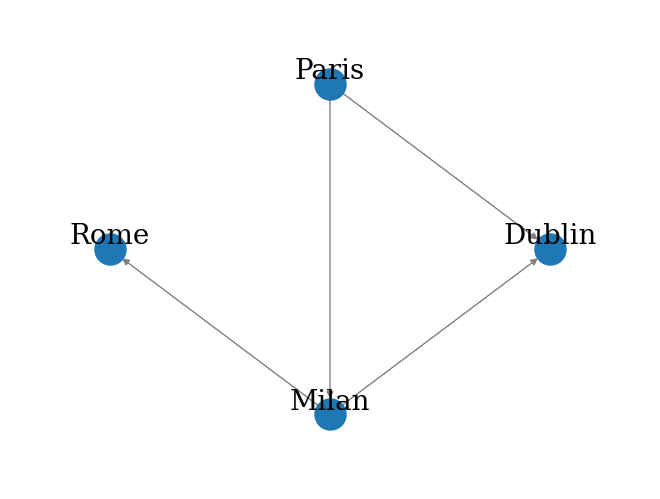

In [15]:
draw_graph(G, layout=nx.shell_layout, node_size=500)

## Weighted Directed Graph

  source  target  weight
0  Milan    Rome       5
1  Milan  Dublin      19
2  Paris  Dublin      11
3  Paris   Milan       8
        Rome  Milan  Dublin  Paris
Rome     0.0    0.0     0.0    0.0
Milan    5.0    0.0    19.0    0.0
Dublin   0.0    0.0     0.0    0.0
Paris    0.0    8.0    11.0    0.0


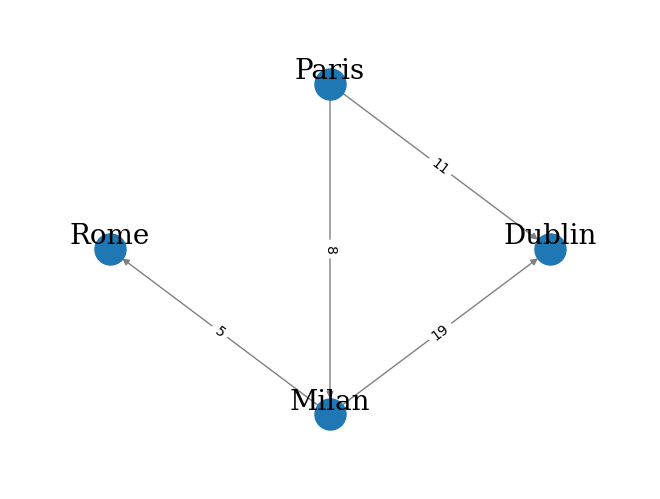

In [16]:
import networkx as nx
G = nx.MultiDiGraph()
V = {'Paris', 'Dublin','Milan', 'Rome'}
E = [ ('Paris','Dublin', 11), ('Paris','Milan', 8),
     ('Milan','Rome', 5),('Milan','Dublin', 19)]
G.add_nodes_from(V)
G.add_weighted_edges_from(E)
draw_graph(G, layout=nx.shell_layout, node_size=500, plot_weight=True)
print(nx.to_pandas_edgelist(G))
print(nx.to_pandas_adjacency(G))

## Bipartite Graph

In [17]:
n_nodes = 10
n_edges = 12
bottom_nodes = [ith for ith in range(n_nodes) if ith % 2 ==0]
top_nodes = [ith for ith in range(n_nodes) if ith % 2 ==1]
iter_edges = zip(
    np.random.choice(bottom_nodes, n_edges),  
    np.random.choice(top_nodes, n_edges))
edges = pd.DataFrame([
    {"source": a, "target": b} for a, b in iter_edges])
B = nx.Graph()
B.add_nodes_from(bottom_nodes, bipartite=0)
B.add_nodes_from(top_nodes, bipartite=1)
B.add_edges_from([tuple(x) for x in edges.values])

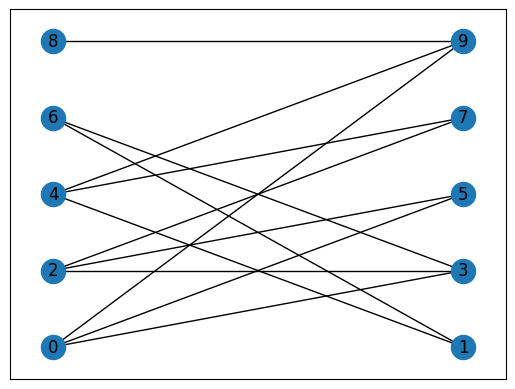

In [18]:
from networkx.drawing.layout import bipartite_layout
pos = bipartite_layout(B, bottom_nodes)
nx.draw_networkx(B, pos=pos)

## Multi Graph

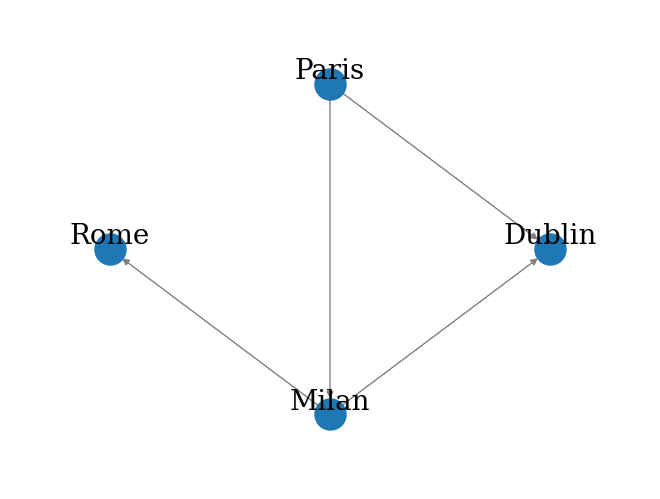

In [19]:
import networkx as nx
directed_multi_graph = nx.MultiDiGraph()
V = {'Dublin', 'Paris', 'Milan', 'Rome'}
E = [('Milan','Dublin'), ('Milan','Dublin'), ('Paris','Milan'), ('Paris','Dublin'), ('Milan','Rome'), ('Milan','Rome')]
directed_multi_graph.add_nodes_from(V)
directed_multi_graph.add_edges_from(E)

draw_graph(G, layout=nx.shell_layout, node_size=500)